In [2]:
import pandas as pd
df = pd.read_csv("data/pillbox.csv")

/var/folders/ph/f7651cvn71dglk2v4rgjpnbw0000gn/T/ipykernel_19080/4089998234.py:2: DtypeWarning: Columns (6,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/pillbox.csv")


In [2]:
df.head(3)

,ID,Enabled?,created at,updated at,spp,setid,splsize,pillbox_size,splshape,splshape_text,...,splimage,has_image,epc_match,version_number,laberer_code,application_number,updated,stale,new,Pillbox Value
0,41846,True,2017 Oct 17 05:32:23 PM,2020 Oct 02 05:14:07 PM,471fa2f1-73a0-49be-89f3-d3e2cfdaeca0-0603-5892-0,471fa2f1-73a0-49be-89f3-d3e2cfdaeca0,16,NaN,C48336,CAPSULE,...,NaN,False,NaN,5,NaN,NaN,True,False,False,False
1,8100,True,2017 Oct 17 05:29:56 PM,2020 Oct 02 04:59:28 PM,116e13c1-ac50-400f-880f-5779f0155b96-59779-074-0,116e13c1-ac50-400f-880f-5779f0155b96,10,NaN,C48348,ROUND,...,NaN,False,NaN,4,NaN,NaN,True,False,False,False
2,5258,True,2017 Oct 17 05:29:44 PM,2017 Oct 17 05:29:44 PM,827ce261-307b-4398-8993-333c08e601fe-49884-129-0,827ce261-307b-4398-8993-333c08e601fe,7,NaN,C48346,PENTAGON (5 SIDED),...,498840129,True,NaN,4,NaN,NaN,False,True,False,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83925 entries, 0 to 83924
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  83925 non-null  int64  
 1   Enabled?            83925 non-null  bool   
 2   created at          83925 non-null  object 
 3   updated at          83925 non-null  object 
 4   spp                 83925 non-null  object 
 5   setid               83925 non-null  object 
 6   splsize             83924 non-null  object 
 7   pillbox_size        43 non-null     float64
 8   splshape            83924 non-null  object 
 9   splshape_text       83924 non-null  object 
 10  pillbox_shape_text  325 non-null    object 
 11  splscore            83370 non-null  float64
 12  pillbox_score       83 non-null     float64
 13  splimprint          81872 non-null  object 
 14  pillbox_imprint     168 non-null    object 
 15  splcolor            83923 non-null  object 
 16  splc

In [4]:
df['Pillbox Value'].sample(5)

45579    False
44006    False
37233    False
13668    False
60025    False
Name: Pillbox Value, dtype: bool

In [5]:
df_filter = df[['ID', 'splcolor_text', 'splshape_text', 'product_code', 'medicine_name', 'dosage_form', 'splimage', 'splimprint']].copy()
# we are not using has_image as there are some data quality issues with it (mapped images but has_image is set to False)

In [6]:
df_filter['medicine_name'] = df_filter['medicine_name'].str.upper()
df_filter['splimage'] = df_filter['splimage'].str.upper()

In [7]:
splimprint_ctd = df_filter[df_filter['splimprint'].notna() == True]
print(f"splimprint count: {len(splimprint_ctd)}")

splimage_ctd = df_filter[df_filter['splimage'].notna() == True]
print(f"splimage count: {len(splimage_ctd)}")

splimprint count: 81872
splimage count: 9795


## Map images

In [8]:
import os

# create a list of image names from pillbox file
image_files = os.listdir('data/pillbox_production_images_full_202008')
df_images = pd.DataFrame({
    'original_name': [f for f in image_files if f.endswith(('.jpg', '.png'))],
    'image_name': [f.replace('.jpg', '').replace('.png', '').upper() for f in image_files if f.endswith(('.jpg', '.png'))]
})
df_images.head(5)

,original_name,image_name
0,8b4a7e47-351f-4f6f-e053-2a95a90a6448.jpg,8B4A7E47-351F-4F6F-E053-2A95A90A6448
1,422910697.jpg,422910697
2,00527-1349-10_53082981.jpg,00527-1349-10_53082981
3,604290239.jpg,604290239
4,65862-0008-99_NLMIMAGE10_B044D816.jpg,65862-0008-99_NLMIMAGE10_B044D816


In [9]:
# perform inner join
mapped_df = pd.merge(df_filter, df_images, how='inner', left_on='splimage', right_on='image_name')
print(f"Rows after inner join: {len(mapped_df)}")
mapped_df = mapped_df.drop(columns='image_name')
mapped_df.head()

Rows after inner join: 9795


,ID,splcolor_text,splshape_text,product_code,medicine_name,dosage_form,splimage,splimprint,original_name
0,5258,GREEN,PENTAGON (5 SIDED),49884-129,DEXAMETHASONE,C42998,498840129,par;129,498840129.jpg
1,20426,YELLOW,CAPSULE,0555-1883,BENZONATATE,C25158,005551883,PA83,005551883.jpg
2,34634,BLUE,CAPSULE,62584-975,DILTIAZEM HYDROCHLORIDE,C42916,625840975,R;2577,625840975.jpg
3,29801,YELLOW,OVAL,0228-2855,GUANFACINE,C42927,00228-2855-11_NLMIMAGE10_0B4085F4,855,00228-2855-11_NLMIMAGE10_0B4085F4.jpg
4,3766,YELLOW;BROWN,CAPSULE,63739-375,GABAPENTIN,C25158,637390375,R2666,637390375.jpg


In [10]:
# Count number of colors per row (split by ';')
mapped_df['num_colors'] = mapped_df['splcolor_text'].str.split(';').str.len()

# Count rows by number of colors
color_distribution = mapped_df['num_colors'].value_counts().sort_index()

print("="*50)
print("Color Distribution Analysis:")
print("="*50)
for num_colors, count in color_distribution.items():
    print(f"Rows with {int(num_colors)} color(s): {count}")

print(f"\nTotal rows with color data: {mapped_df['num_colors'].notna().sum()}")
print(f"Rows with missing color data: {mapped_df['num_colors'].isna().sum()}")

# Count number of imprint sections per row (split by ';')
mapped_df['num_imprints'] = mapped_df['splimprint'].str.split(';').str.len()

# Count rows by number of imprint sections
imprint_distribution = mapped_df['num_imprints'].value_counts().sort_index()

print("\n" + "="*50)
print("Imprint Distribution Analysis:")
print("="*50)
for num_imprints, count in imprint_distribution.items():
    print(f"Rows with {int(num_imprints)} imprint section(s): {count}")

print(f"Rows with missing imprint data: {mapped_df['num_imprints'].isna().sum()}")

Color Distribution Analysis:
Rows with 1 color(s): 9002
Rows with 2 color(s): 770
Rows with 3 color(s): 21
Rows with 4 color(s): 2

Total rows with color data: 9795
Rows with missing color data: 0

Imprint Distribution Analysis:
Rows with 1 imprint section(s): 1737
Rows with 2 imprint section(s): 5761
Rows with 3 imprint section(s): 1464
Rows with 4 imprint section(s): 450
Rows with 5 imprint section(s): 100
Rows with 6 imprint section(s): 15
Rows with 7 imprint section(s): 4
Rows with 9 imprint section(s): 1
Rows with missing imprint data: 263


For simplicity, we will take the first color that shows up when more than one color is indicated. Furthermore imprint text is likely to contribute more to the classification. As we are using YOLO for imprint detection, we shall keep the imprint text as is.

In [11]:
mapped_df['splcolor_text'] = mapped_df['splcolor_text'].str.split(';').str[0]

In [12]:
mapped_df.head()

,ID,splcolor_text,splshape_text,product_code,medicine_name,dosage_form,splimage,splimprint,original_name,num_colors,num_imprints
0,5258,GREEN,PENTAGON (5 SIDED),49884-129,DEXAMETHASONE,C42998,498840129,par;129,498840129.jpg,1,2.0
1,20426,YELLOW,CAPSULE,0555-1883,BENZONATATE,C25158,005551883,PA83,005551883.jpg,1,1.0
2,34634,BLUE,CAPSULE,62584-975,DILTIAZEM HYDROCHLORIDE,C42916,625840975,R;2577,625840975.jpg,1,2.0
3,29801,YELLOW,OVAL,0228-2855,GUANFACINE,C42927,00228-2855-11_NLMIMAGE10_0B4085F4,855,00228-2855-11_NLMIMAGE10_0B4085F4.jpg,1,1.0
4,3766,YELLOW,CAPSULE,63739-375,GABAPENTIN,C25158,637390375,R2666,637390375.jpg,2,1.0


In [13]:
# save mapped_df - this will be our training/ testing data
mapped_df.to_csv('data/pillbox_mapped.csv')

# Explore held out set F

In [3]:
heldout_df = pd.read_csv("data/pillbox_heldout_F.csv")

In [4]:
heldout_df.columns

Index(['Unnamed: 0', 'ID', 'splcolor_text', 'product_code', 'medicine_name',
       'dosage_form', 'splimage', 'splimprint', 'has_image', 'splimprint1',
       'splimprint2'],
      dtype='object')

In [10]:
# Check for duplicated images in heldout_df
print("="*50)
print("Duplicate Image Analysis for heldout_df:")
print("="*50)

# Check for duplicate splimage values
duplicates = heldout_df[heldout_df.duplicated(subset=['splimage'], keep=False)]
duplicate_images = heldout_df['splimage'].duplicated().sum()

print(f"\nTotal rows in heldout_df: {len(heldout_df)}")
print(f"Unique images (splimage): {heldout_df['splimage'].nunique()}")
print(f"Duplicate image entries: {duplicate_images}")
print(f"Rows with duplicated images: {len(duplicates)}")

if len(duplicates) > 0:
    print("\n" + "="*50)
    print("Duplicated Images Details:")
    print("="*50)
    # Show duplicated images grouped
    duplicate_groups = duplicates.groupby('splimage').size().sort_values(ascending=False)
    print(f"\nNumber of unique images that have duplicates: {len(duplicate_groups)}")
    print(f"\nTop 10 most duplicated images:")
    print(duplicate_groups.head(10))
    
    # Check if duplicated images also have duplicated product_codes
    print("\n" + "="*50)
    print("Product Code Duplication Analysis:")
    print("="*50)
    
    # For each duplicated image, check if product_code is also duplicated
    dup_image_product = duplicates.groupby('splimage')['product_code'].apply(lambda x: x.nunique())
    
    images_with_same_product = (dup_image_product == 1).sum()
    images_with_diff_products = (dup_image_product > 1).sum()
    
    print(f"\nImages with SAME product_code across all duplicates: {images_with_same_product}")
    print(f"Images with DIFFERENT product_codes: {images_with_diff_products}")
    
    # Check if duplicated images also have duplicated imprints
    print("\n" + "="*50)
    print("Imprint Duplication Analysis:")
    print("="*50)
    
    # For each duplicated image, check if imprint is also the same
    dup_image_imprint = duplicates.groupby('splimage')['splimprint'].apply(lambda x: x.nunique())
    
    images_with_same_imprint = (dup_image_imprint == 1).sum()
    images_with_diff_imprints = (dup_image_imprint > 1).sum()
    
    print(f"\nImages with SAME imprint across all duplicates: {images_with_same_imprint}")
    print(f"Images with DIFFERENT imprints: {images_with_diff_imprints}")
    
    # Cross-tabulate product_code and imprint consistency
    print("\n--- Cross-analysis: Product Code vs Imprint Consistency ---")
    same_product_same_imprint = 0
    same_product_diff_imprint = 0
    diff_product_same_imprint = 0
    diff_product_diff_imprint = 0
    
    for img in duplicate_groups.index:
        has_same_product = dup_image_product[img] == 1
        has_same_imprint = dup_image_imprint[img] == 1
        
        if has_same_product and has_same_imprint:
            same_product_same_imprint += 1
        elif has_same_product and not has_same_imprint:
            same_product_diff_imprint += 1
        elif not has_same_product and has_same_imprint:
            diff_product_same_imprint += 1
        else:
            diff_product_diff_imprint += 1
    
    print(f"Same product, same imprint: {same_product_same_imprint}")
    print(f"Same product, different imprint: {same_product_diff_imprint}")
    print(f"Different product, same imprint: {diff_product_same_imprint}")
    print(f"Different product, different imprint: {diff_product_diff_imprint}")
    
    # Show examples of both cases
    print("\n" + "="*50)
    print("Examples of duplicated images with SAME product_code:")
    print("="*50)
    same_product_images = dup_image_product[dup_image_product == 1].head(5).index
    for img in same_product_images:
        img_data = duplicates[duplicates['splimage'] == img][['ID', 'splimage', 'medicine_name', 'product_code', 'splimprint']]
        print(f"\nImage: {img}")
        print(img_data)
    
    print("\n" + "="*50)
    print("Examples of duplicated images with DIFFERENT product_codes:")
    print("="*50)
    diff_product_images = dup_image_product[dup_image_product > 1].head(5).index
    for img in diff_product_images:
        img_data = duplicates[duplicates['splimage'] == img][['ID', 'splimage', 'medicine_name', 'product_code', 'splimprint']]
        print(f"\nImage: {img} (has {dup_image_product[img]} different product_codes, {dup_image_imprint[img]} different imprints)")
        print(img_data)
    
    # Show examples of same image, different imprints (data quality concern)
    if images_with_diff_imprints > 0:
        print("\n" + "="*50)
        print("CONCERN: Examples with same image but DIFFERENT imprints:")
        print("="*50)
        diff_imprint_images = dup_image_imprint[dup_image_imprint > 1].head(5).index
        for img in diff_imprint_images:
            img_data = duplicates[duplicates['splimage'] == img][['ID', 'splimage', 'medicine_name', 'product_code', 'splimprint']]
            print(f"\nImage: {img} (has {dup_image_imprint[img]} different imprints)")
            print(img_data)
    
    print("\n" + "="*50)
    print("Sample of duplicated rows:")
    print("="*50)
    print(duplicates.sort_values('splimage')[['ID', 'splimage', 'medicine_name', 'product_code', 'splimprint']].head(20))
else:
    print("\nNo duplicate images found in heldout_df.")

Duplicate Image Analysis for heldout_df:

Total rows in heldout_df: 82548
Unique images (splimage): 7594
Duplicate image entries: 74953
Rows with duplicated images: 75240

Duplicated Images Details:

Number of unique images that have duplicates: 286

Top 10 most duplicated images:
splimage
NO_PRODUCT_IMAGE                        278
00093031105                              19
00093585101                              15
50111043301                              15
50111043401                              14
00555088602                              10
67CEBB68-5AB8-0E60-E053-2991AA0A0FBE     10
18A79505-B506-62C0-E054-00144FF88E88      9
00093894301                               9
50111033301                               9
dtype: int64

Product Code Duplication Analysis:

Images with SAME product_code across all duplicates: 76
Images with DIFFERENT product_codes: 210

Imprint Duplication Analysis:

Images with SAME imprint across all duplicates: 267
Images with DIFFERENT imprints: 17

--

Image: 00054-0020-25_250892B4
Number of different product codes: 2
          ID                splimage      medicine_name product_code splimprint
60184  34769  00054-0020-25_250892B4  LITHIUM CARBONATE    0054-0020     54;346
33050  16482  00054-0020-25_250892B4  LITHIUM CARBONATE    68084-655     54;346



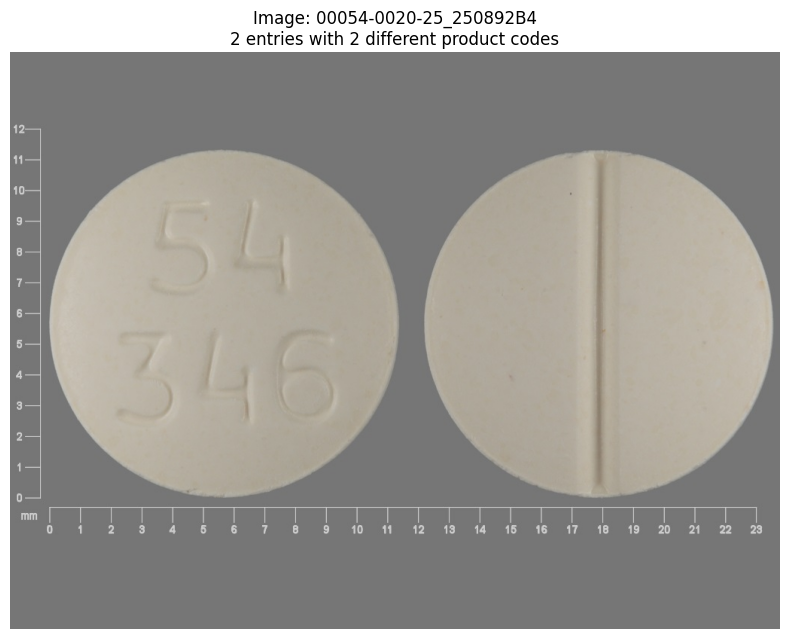



Image: 00085-1733-03_SPLIMAGE30_2619935C
Number of different product codes: 5
          ID                           splimage               medicine_name product_code  splimprint
3521   19986  00085-1733-03_SPLIMAGE30_2619935C                      AVELOX    0085-1733  BAYER;M400
59109  44309  00085-1733-03_SPLIMAGE30_2619935C  MOXIFLOXACIN HYDROCHLORIDE    43063-580  BAYER;M400
53164  43736  00085-1733-03_SPLIMAGE30_2619935C  MOXIFLOXACIN HYDROCHLORIDE    43063-585  BAYER;M400
16850  32951  00085-1733-03_SPLIMAGE30_2619935C  MOXIFLOXACIN HYDROCHLORIDE    47781-268  BAYER;M400
67412  17017  00085-1733-03_SPLIMAGE30_2619935C                      AVELOX    55289-077  BAYER;M400



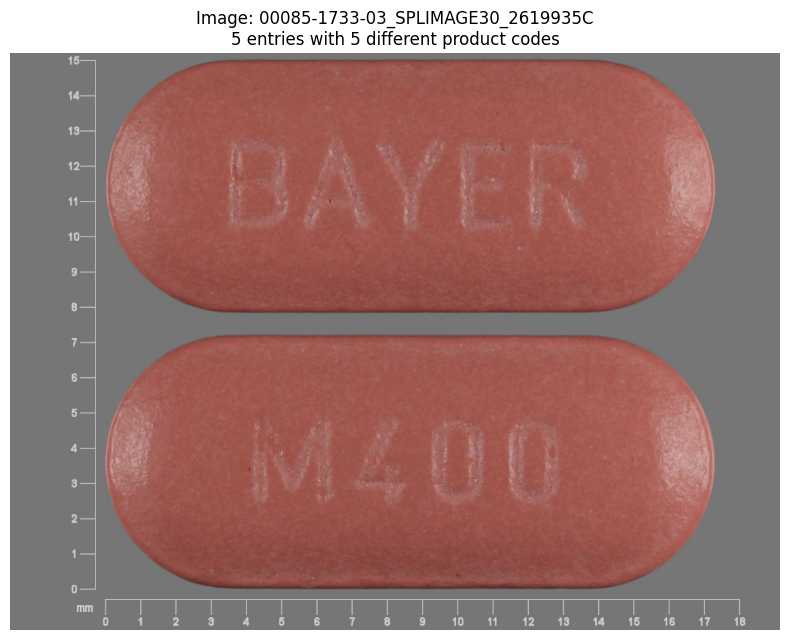



Image: 00093-0149-01
Number of different product codes: 2
          ID       splimage medicine_name product_code splimprint
69181   8770  00093-0149-01      NAPROXEN   58118-0149   TEVA;149
52179  50125  00093-0149-01      NAPROXEN    61786-666   TEVA;149



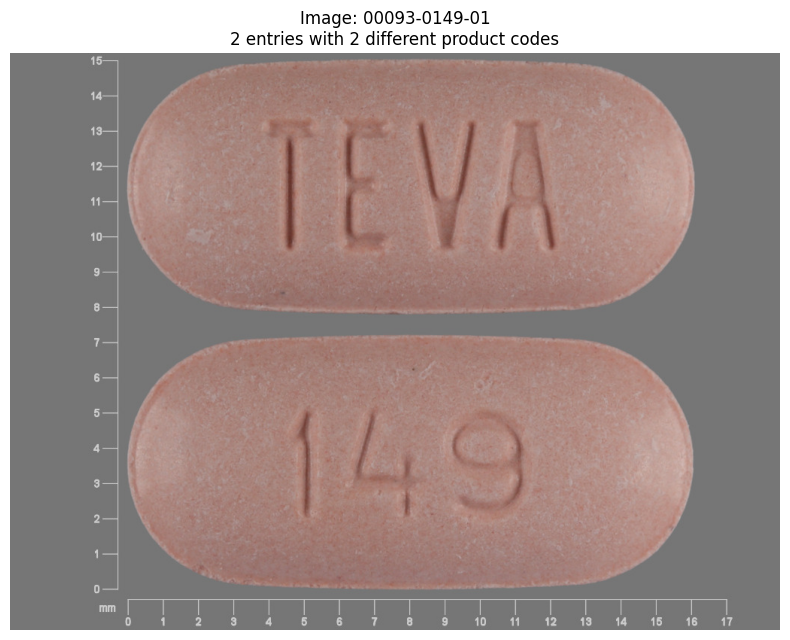

In [9]:
# Display images that have the same splimage but different product_codes
from PIL import Image
import matplotlib.pyplot as plt
import os

# Get images with different product codes from heldout_df
duplicates = heldout_df[heldout_df.duplicated(subset=['splimage'], keep=False)]
dup_image_product = duplicates.groupby('splimage')['product_code'].apply(lambda x: x.nunique())
diff_product_images = dup_image_product[dup_image_product > 1]

# Get a few examples (excluding NO_PRODUCT_IMAGE)
examples = [img for img in diff_product_images.index if img != 'NO_PRODUCT_IMAGE'][:3]

image_dir = 'data/pillbox_production_images_full_202008'

for img_name in examples:
    # Get all rows with this image
    img_rows = duplicates[duplicates['splimage'] == img_name][['ID', 'splimage', 'medicine_name', 'product_code', 'splimprint']].sort_values('product_code')
    
    print("="*80)
    print(f"Image: {img_name}")
    print(f"Number of different product codes: {len(img_rows['product_code'].unique())}")
    print("="*80)
    print(img_rows.to_string())
    print()
    
    # Try to find and display the image
    # Check for both .jpg and .png extensions
    img_path_jpg = os.path.join(image_dir, f"{img_name.lower()}.jpg")
    img_path_png = os.path.join(image_dir, f"{img_name.lower()}.png")
    
    img_path = None
    if os.path.exists(img_path_jpg):
        img_path = img_path_jpg
    elif os.path.exists(img_path_png):
        img_path = img_path_png
    
    if img_path:
        try:
            img = Image.open(img_path)
            plt.figure(figsize=(8, 8))
            plt.imshow(img)
            plt.title(f"Image: {img_name}\n{len(img_rows)} entries with {len(img_rows['product_code'].unique())} different product codes")
            plt.axis('off')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error loading image: {e}")
    else:
        print(f"Image file not found: {img_name}")
    
    print("\n")

# Deduplicate Heldout F

In [11]:
# Deduplicate heldout_df based on splimage
print("="*50)
print("Deduplication Process:")
print("="*50)

print(f"\nOriginal heldout_df shape: {heldout_df.shape}")
print(f"Total rows: {len(heldout_df)}")
print(f"Unique images (splimage): {heldout_df['splimage'].nunique()}")

# Keep the first occurrence of each splimage
heldout_df_cleaned = heldout_df.drop_duplicates(subset=['splimage'], keep='first')

print(f"\nAfter deduplication:")
print(f"Cleaned shape: {heldout_df_cleaned.shape}")
print(f"Total rows: {len(heldout_df_cleaned)}")
print(f"Unique images (splimage): {heldout_df_cleaned['splimage'].nunique()}")
print(f"\nRows removed: {len(heldout_df) - len(heldout_df_cleaned)}")

# Save the cleaned dataset
output_path = 'data/pillbox_heldout_F_cleaned.csv'
heldout_df_cleaned.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")

# Show a sample of the cleaned data
print("\n" + "="*50)
print("Sample of cleaned data:")
print("="*50)
print(heldout_df_cleaned[['ID', 'splimage', 'medicine_name', 'product_code', 'splimprint']].head(10))

Deduplication Process:

Original heldout_df shape: (82548, 11)
Total rows: 82548
Unique images (splimage): 7594

After deduplication:
Cleaned shape: (7595, 11)
Total rows: 7595
Unique images (splimage): 7594

Rows removed: 74953

Cleaned dataset saved to: data/pillbox_heldout_F_cleaned.csv

Sample of cleaned data:
       ID                           splimage            medicine_name  \
0   41846                                NaN                TEMAZEPAM   
2    5258                          498840129            DEXAMETHASONE   
12  20426                          005551883              BENZONATATE   
29  34634                          625840975  DILTIAZEM HYDROCHLORIDE   
35   3766                          637390375               GABAPENTIN   
45  11745                          634810025                    FROVA   
46   5712  42794-0019-02_NLMIMAGE10_BC40DE26      LIOTHYRONINE SODIUM   
49  30065  50844-0249-33_NLMIMAGE10_C235E11F                  ASPIRIN   
53  20665                  

In [12]:
# Check that every row can be mapped to an image
import os

image_dir = 'data/pillbox_production_images_full_202008'

# Get available image names (without extension, uppercase)
available_images = {f.replace('.jpg', '').replace('.png', '').upper() 
                   for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))}

# Check rows with non-null splimage
heldout_with_image = heldout_df_cleaned[heldout_df_cleaned['splimage'].notna()]
can_map = heldout_with_image['splimage'].str.upper().isin(available_images)

print(f"Rows with image: {len(heldout_with_image)}")
print(f"Can map: {can_map.sum()}")
print(f"Cannot map: {(~can_map).sum()}")
print(f"Success rate: {can_map.sum() / len(heldout_with_image) * 100:.1f}%")

Rows with image: 7594
Can map: 7594
Cannot map: 0
Success rate: 100.0%


In [6]:
train_test = pd.read_csv("data/pillbox_train_test_F.csv")

In [ ]:
# Check for duplicated images in train_test
print("="*50)
print("Duplicate Image Analysis for train_test:")
print("="*50)

# Check for duplicate splimage values
duplicates = train_test[train_test.duplicated(subset=['splimage'], keep=False)]
duplicate_images = train_test['splimage'].duplicated().sum()

print(f"\nTotal rows in train_test: {len(train_test)}")
print(f"Unique images (splimage): {train_test['splimage'].nunique()}")
print(f"Duplicate image entries: {duplicate_images}")
print(f"Rows with duplicated images: {len(duplicates)}")

if len(duplicates) > 0:
    print("\n" + "="*50)
    print("Duplicated Images Details:")
    print("="*50)
    # Show duplicated images grouped
    duplicate_groups = duplicates.groupby('splimage').size().sort_values(ascending=False)
    print(f"\nNumber of unique images that have duplicates: {len(duplicate_groups)}")
    print(f"\nTop 10 most duplicated images:")
    print(duplicate_groups.head(10))
    
    print("\n" + "="*50)
    print("Sample of duplicated rows:")
    print("="*50)
    print(duplicates.sort_values('splimage')[['ID', 'splimage', 'medicine_name', 'product_code', 'splimprint']].head(20))
else:
    print("\nNo duplicate images found in train_test.")

In [2]:
import pandas as pd
import os
# Read the cleaned CSV
df_heldout = pd.read_csv('data/pillbox_heldout_F_cleaned.csv')

# Create the image files DataFrame
image_files = os.listdir('data/pillbox_production_images_full_202008')
df_images = pd.DataFrame({
    'original_name': [f for f in image_files if f.endswith(('.jpg', '.png'))],
    'image_name': [f.replace('.jpg', '').replace('.png', '').upper() for f in image_files if f.endswith(('.jpg', '.png'))]
})

# Merge to add original_name column
df_heldout_merged = df_heldout.merge(
    df_images[['image_name', 'original_name']], 
    left_on='splimage', 
    right_on='image_name', 
    how='left'
)

# Drop the redundant image_name column from the merge
df_heldout_merged = df_heldout_merged.drop(columns=['image_name'])

# Save back to CSV
df_heldout_merged.to_csv('data/pillbox_heldout_F_cleaned.csv', index=False)

# Check the result
print(f"Total rows: {len(df_heldout_merged)}")
print(f"Rows with matched images: {df_heldout_merged['original_name'].notna().sum()}")
df_heldout_merged.head()

Total rows: 7595
Rows with matched images: 7594


,Unnamed: 0,ID,splcolor_text,product_code,medicine_name,dosage_form,splimage,splimprint,has_image,splimprint1,splimprint2,original_name
0,0,41846,PINK,0603-5892,TEMAZEPAM,C25158,NaN,5892;V,False,5892,V,NaN
1,2,5258,GREEN,49884-129,DEXAMETHASONE,C42998,498840129,par;129,True,par,129,498840129.jpg
2,12,20426,YELLOW,0555-1883,BENZONATATE,C25158,005551883,PA83,True,PA83,NaN,005551883.jpg
3,29,34634,BLUE,62584-975,DILTIAZEM HYDROCHLORIDE,C42916,625840975,R;2577,True,R,2577,625840975.jpg
4,36,3766,YELLOW;BROWN,63739-375,GABAPENTIN,C25158,637390375,R2666,True,R2666,NaN,637390375.jpg


In [2]:
import pandas as pd
database_df = pd.read_csv("data/pillbox_cleaned.csv")

In [9]:
database_df.columns

Index(['Unnamed: 0', 'ID', 'splcolor_text', 'product_code', 'medicine_name',
       'dosage_form', 'splimage', 'splimprint', 'has_image'],
      dtype='object')

In [8]:
database_df.drop(columns=['splimprint1', 'splimprint2'], inplace=True)

In [10]:
# Check for duplicate images in database_df
duplicates = database_df[database_df.duplicated(subset=['splimage'], keep=False)]
duplicate_images = database_df['splimage'].duplicated().sum()

print(f"Total rows: {len(database_df)}")
print(f"Unique images: {database_df['splimage'].nunique()}")
print(f"Duplicate entries: {duplicate_images}")
print(f"Rows with duplicates: {len(duplicates)}")

Total rows: 83925
Unique images: 8693
Duplicate entries: 75231
Rows with duplicates: 75588


In [11]:
# Deduplicate database_df
database_df_cleaned = database_df.drop_duplicates(subset=['splimage'], keep='first')

print(f"Original rows: {len(database_df)}")
print(f"After deduplication: {len(database_df_cleaned)}")
print(f"Rows removed: {len(database_df) - len(database_df_cleaned)}")

Original rows: 83925
After deduplication: 8694
Rows removed: 75231


In [12]:
# Clean splimprint: replace ';', '-', '/' with '_'
database_df_cleaned['splimprint_clean'] = database_df_cleaned['splimprint'].str.replace('[;/-]', '_', regex=True)

# Replace ' OR ' with '_'
database_df_cleaned['splimprint_clean'] = database_df_cleaned['splimprint_clean'].str.replace(' OR ', '_', regex=False)

# Replace ½ with 1_2
database_df_cleaned['splimprint_clean'] = database_df_cleaned['splimprint_clean'].str.replace('½', '1_2', regex=False)

# Show some examples of changes
changed = database_df_cleaned[database_df_cleaned['splimprint'] != database_df_cleaned['splimprint_clean']][['splimprint', 'splimprint_clean']].head(10)
print("Example conversions:")
print(changed.to_string(index=False))
print(f"\nTotal changed: {(database_df_cleaned['splimprint'] != database_df_cleaned['splimprint_clean']).sum()}")

Example conversions:
    splimprint splimprint_clean
        5892;V           5892_V
       par;129          par_129
        R;2577           R_2577
         E;2;5            E_2_5
ASPIRIN;44;249   ASPIRIN_44_249
        AR;788           AR_788
         93;16            93_16
       7432;TV          7432_TV
           NaN              NaN
         W;905            W_905

Total changed: 7078


/var/folders/ph/f7651cvn71dglk2v4rgjpnbw0000gn/T/ipykernel_14254/301938890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database_df_cleaned['splimprint_clean'] = database_df_cleaned['splimprint'].str.replace('[;/-]', '_', regex=True)
/var/folders/ph/f7651cvn71dglk2v4rgjpnbw0000gn/T/ipykernel_14254/301938890.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database_df_cleaned['splimprint_clean'] = database_df_cleaned['splimprint_clean'].str.replace(' OR ', '_', regex=False)
/var/folders/ph/f7651cvn

In [14]:
import re
# Final check for remaining non-alphanumeric symbols
remaining_symbols = {}
for idx, row in database_df_cleaned.iterrows():
    imprint = str(row['splimprint_clean'])
    if imprint != 'nan':
        non_alnum = re.findall(r'[^A-Za-z0-9_]', imprint)  # Allow underscore
        for sym in set(non_alnum):
            if sym not in remaining_symbols:
                remaining_symbols[sym] = []
            if len(remaining_symbols[sym]) < 5:
                remaining_symbols[sym].append(imprint)

if remaining_symbols:
    print("Remaining non-alphanumeric symbols (excluding '_'):")
    print("=" * 60)
    for sym, examples in sorted(remaining_symbols.items()):
        print(f"\nSymbol: '{sym}'")
        print(f"Examples: {examples[:5]}")
else:
    print("✓ No remaining symbols! All clean (only A-Z, 0-9, _)")

Remaining non-alphanumeric symbols (excluding '_'):

Symbol: '.'
Examples: ['Deltasone_2.5', 'ROCALTROL_0.25_ROCHE', 'ROCALTROL_0.5_ROCHE']


In [24]:
database_df_cleaned.columns

Index(['Unnamed: 0', 'ID', 'splcolor_text', 'product_code', 'medicine_name',
       'dosage_form', 'splimage', 'splimprint', 'has_image',
       'splimprint_clean', 'splshape_text_x', 'splshape_text_y'],
      dtype='object')

In [18]:
df = pd.read_csv("data/pillbox.csv")

/var/folders/ph/f7651cvn71dglk2v4rgjpnbw0000gn/T/ipykernel_14254/1874162781.py:1: DtypeWarning: Columns (6,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/pillbox.csv")


In [23]:
# Add splshape_text column to database_df_cleaned by matching on ID
database_df_cleaned = database_df_cleaned.merge(
    df[['ID', 'splshape_text']], 
    on='ID', 
    how='left'
)

print(f"Added splshape_text column")
print(f"Non-null splshape_text values: {database_df_cleaned['splshape_text'].notna().sum()}")

# Add image_name column that maps splimage to actual image files
import os
image_files = os.listdir('data/pillbox_production_images_full_202008')
df_images = pd.DataFrame({
    'original_name': [f for f in image_files if f.endswith(('.jpg', '.png'))],
    'image_name_upper': [f.replace('.jpg', '').replace('.png', '').upper() for f in image_files if f.endswith(('.jpg', '.png'))]
})

# Merge to add image_name column
database_df_cleaned = database_df_cleaned.merge(
    df_images[['image_name_upper', 'original_name']], 
    left_on='splimage', 
    right_on='image_name_upper', 
    how='left'
)

# Rename original_name to image_name and drop the temporary column
database_df_cleaned = database_df_cleaned.rename(columns={'original_name': 'image_name'})
database_df_cleaned = database_df_cleaned.drop(columns=['image_name_upper'])

print(f"\nAdded image_name column")
print(f"Rows with matched images: {database_df_cleaned['image_name'].notna().sum()}")
database_df_cleaned.head()

Added splshape_text column


KeyError: 'splshape_text'

In [25]:
# Clean up duplicate splshape_text columns and add image_name
# Keep splshape_text_y (from the merge) and drop splshape_text_x
database_df_cleaned = database_df_cleaned.drop(columns=['splshape_text_x'])
database_df_cleaned = database_df_cleaned.rename(columns={'splshape_text_y': 'splshape_text'})

# Add image_name column that maps splimage to actual image files
import os
image_files = os.listdir('data/pillbox_production_images_full_202008')
df_images = pd.DataFrame({
    'image_name': [f for f in image_files if f.endswith(('.jpg', '.png'))],
    'image_name_upper': [f.replace('.jpg', '').replace('.png', '').upper() for f in image_files if f.endswith(('.jpg', '.png'))]
})

# Merge to add image_name column
database_df_cleaned = database_df_cleaned.merge(
    df_images[['image_name_upper', 'image_name']], 
    left_on='splimage', 
    right_on='image_name_upper', 
    how='left'
)

# Drop the temporary column
database_df_cleaned = database_df_cleaned.drop(columns=['image_name_upper'])

print(f"Cleaned columns and added image_name")
print(f"Non-null splshape_text values: {database_df_cleaned['splshape_text'].notna().sum()}")
print(f"Rows with matched images: {database_df_cleaned['image_name'].notna().sum()}")
print(f"\nColumns: {database_df_cleaned.columns.tolist()}")
database_df_cleaned.head()

Cleaned columns and added image_name
Non-null splshape_text values: 8694
Rows with matched images: 8693

Columns: ['Unnamed: 0', 'ID', 'splcolor_text', 'product_code', 'medicine_name', 'dosage_form', 'splimage', 'splimprint', 'has_image', 'splimprint_clean', 'splshape_text', 'image_name']


,Unnamed: 0,ID,splcolor_text,product_code,medicine_name,dosage_form,splimage,splimprint,has_image,splimprint_clean,splshape_text,image_name
0,0,41846,PINK,0603-5892,TEMAZEPAM,C25158,NaN,5892;V,False,5892_V,CAPSULE,NaN
1,2,5258,GREEN,49884-129,DEXAMETHASONE,C42998,498840129,par;129,True,par_129,PENTAGON (5 SIDED),498840129.jpg
2,12,20426,YELLOW,0555-1883,BENZONATATE,C25158,005551883,PA83,True,PA83,CAPSULE,005551883.jpg
3,29,34634,BLUE,62584-975,DILTIAZEM HYDROCHLORIDE,C42916,625840975,R;2577,True,R_2577,CAPSULE,625840975.jpg
4,32,29801,YELLOW,0228-2855,GUANFACINE,C42927,00228-2855-11_NLMIMAGE10_0B4085F4,855,True,855,OVAL,00228-2855-11_NLMIMAGE10_0B4085F4.jpg


In [26]:
database_df_cleaned.to_csv("data/pillbox_cleaned_F.csv")

# Extract Image Names from final_pipeline_test.pt

In [21]:
import torch

# Load the final_pipeline_test.pt file
data = torch.load('final_pipeline_test.pt', weights_only=False)

# Extract the dataframe
df_final_test = data['df_final_test']

# Get image names
image_names = df_final_test['image'].tolist()

print(f"Total images in final_pipeline_test.pt: {len(image_names)}")
print(f"\nFirst 10 image names:")
for i, name in enumerate(image_names[:10], 1):
    print(f"  {i}. {name}")

print(f"\nLast 10 image names:")
for i, name in enumerate(image_names[-10:], len(image_names)-9):
    print(f"  {i}. {name}")

Total images in final_pipeline_test.pt: 741

First 10 image names:
  1. 433530310.jpg
  2. 003786169.jpg
  3. 422910610.jpg
  4. 007812350.jpg
  5. 68180-0313-01_18078C0C.jpg
  6. 00456-3205-60_AA16D556.jpg
  7. 00093964301.jpg
  8. 620370675.jpg
  9. 422910834.jpg
  10. 00145-0090-25_DA196D4B.jpg

Last 10 image names:
  732. 605053280.jpg
  733. 003782003.jpg
  734. image2892.jpg
  735. 001850701.jpg
  736. 63304-0830-90_E91C7493.jpg
  737. 00087-6060-05_4D07A6DD.jpg
  738. 675440189.jpg
  739. 000460975.jpg
  740. 000046416.jpg
  741. 8c3d57a2-6de1-1a41-e053-2a95a90a0bf6.jpg


In [22]:
# Optionally save image names to a text file
output_file = 'main_pipeline_test_image_names.txt'
with open(output_file, 'w') as f:
    for name in image_names:
        f.write(f"{name}\n")

print(f"\nImage names saved to {output_file}")


Image names saved to main_pipeline_test_image_names.txt
